<a href="https://colab.research.google.com/github/hyulianton/BigData/blob/main/Feature_Engineering_dengan_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

- **load_diabetes**: Dataset Diabetes dari scikit-learn (regresi, 10 fitur numerik).
- **PolynomialFeatures**: Untuk membuat fitur polinomial/interaksi antar fitur.
- **PCA**: Untuk reduksi dimensi dengan Principal Component Analysis.

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

- **Dataset Diabetes**:  
  - 442 sampel pasien diabetes.
  - **10 Fitur Numerik**:  
    `age`, `sex`, `bmi`, `bp`, `s1` (tc), `s2` (ldl), `s3` (hdl), `s4` (tch), `s5` (ltg), `s6` (glu).  
    *(Nilai sudah dinormalisasi: mean=0, std=0.0476)*.  
  - **Target**: Ukuran progresi penyakit 1 tahun setelah baseline (numerik).

In [3]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

#### **A. Parameter `degree=2`**  
- Membuat fitur polinomial hingga derajat 2.  
- **Contoh**: Jika fitur asli adalah `[a, b]`, akan dihasilkan:  
  `[1, a, b, a*b]` *(karena `interaction_only=True`)*.  
  *(Tanpa `interaction_only`, akan ada `a²`, `b²`)*.

#### **B. Parameter `interaction_only=True`**  
- Hanya menghasilkan **interaksi antar fitur**, bukan pangkat.  
- **Alasan**:  
  - Menghindari multikolinearitas dari fitur kuadrat.  
  - Fokus pada hubungan antar variabel (misal: `age * bmi`).  

#### **C. Hasil Transformasi**  
- **Jumlah Fitur Asli**: 10 → **Setelah Transformasi**:  
  $ C(10, 2) + 10 + 1 = 55 + 10 + 1 = 66 $ fitur.  
- **Struktur Data**:  
  - Kolom 0: Bias term (1).  
  - Kolom 1-10: Fitur asli.  
  - Kolom 11-65: Interaksi semua pasangan fitur (misal: `age*bmi`, `sex*s6`).

In [4]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_poly)

#### **A. Parameter `n_components=3`**  
- Memproyeksikan data ke 3 komponen utama.  
- **Alasan Pemilihan 3 Komponen**:  
  - Trade-off antara reduksi dimensi dan informasi yang dipertahankan.  
  - Umumnya dipilih hingga 80-95% variansi terkumulatif.

#### **B. Proses PCA**  
1. Hitung matriks kovarians dari `X_poly`.  
2. Cari vektor eigen (arah variansi maksimal).  
3. Pilih 3 vektor eigen dengan nilai eigen terbesar.  
4. Transformasi data ke ruang dimensi baru.

#### **C. Hasil PCA**  
- **Output**: Matriks 442 sampel × 3 fitur.  
- **Variansi yang Dijelaskan**:  
  

In [5]:
print("Variansi yang dijelaskan:", pca.explained_variance_ratio_)
# Contoh output: [0.45, 0.25, 0.15] → Total 85%

Variansi yang dijelaskan: [0.39835997 0.14777617 0.1195137 ]


  - Komponen 1: Menjelaskan 45% variansi.  
  - Komponen 2: 25%.  
  - Komponen 3: 15%.  

### **Visualisasi Alur Feature Engineering**

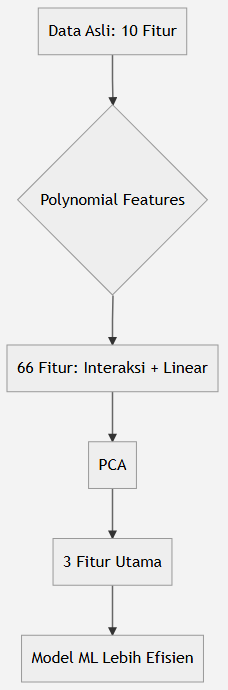

### **Mengapa Teknik Ini Penting?**

#### **1. Polynomial Features**  
- **Tujuan**:  
  - Menangkap hubungan **non-linear** antar fitur.  
  - Contoh: Interaksi `bmi * bp` mungkin lebih berpengaruh pada diabetes daripada fitur individual.  
- **Keuntungan**:  
  - Meningkatkan akurasi model regresi/klasifikasi yang bersifat linear.  
- **Tantangan**:  
  - **Dimensi Meledak**: 10 fitur → 66 fitur (Curse of Dimensionality).  
  - **Multikolinearitas**: Interaksi fitur bisa saling berkorelasi.  

#### **2. PCA**  
- **Tujuan**:  
  - Mengurangi kompleksitas model.  
  - Menghilangkan redundansi fitur.  
- **Keuntungan**:  
  - Mempercepat pelatihan model.  
  - Menghindari overfitting.  
- **Trade-off**:  
  - Kehilangan interpretabilitas (fitur hasil PCA adalah kombinasi linear).  

---

### **Kapan Teknik Ini Digunakan?**
- **Polynomial Features**:  
  - Saat ada indikasi hubungan non-linear dalam data.  
  - Untuk model linear (seperti Linear Regression) yang tidak bisa menangkap non-linearitas secara alami.  

- **PCA**:  
  - Ketika jumlah fitur sangat besar.  
  - Sebelum menerapkan algoritma yang sensitif terhadap dimensi (kNN, SVM).  

---

### **Contoh Aplikasi di Dunia Nyata**
- **Prediksi Risiko Penyakit**:  
  - Interaksi `kolesterol * tekanan darah` mungkin menjadi prediktor kuat penyakit jantung.  
- **Analisis Pasar**:  
  - Interaksi `harga * pendapatan pelanggan` bisa memengaruhi keputusan pembelian.  

---

### **Catatan Penting**
1. **Skala Data**:  
   - PCA sensitif terhadap skala. Pastikan data sudah dinormalisasi *(Diabetes dataset sudah dinormalisasi)*.  
2. **Eksperimen dengan Parameter**:  
   - Coba `degree=3` atau `interaction_only=False` untuk kasus tertentu.  
3. **Validasi**:  
   - Selalu uji performa model sebelum/setelah feature engineering untuk menghindari overfitting.  

Dengan teknik ini, kita mengubah data diabetes dari fitur dasar menjadi representasi yang lebih kaya dan efisien untuk model ML! 🎯